# Using the `basicml` Module with PyTorch

The `basicml` module in `pydatapull` can be easily used with PyTorch. Each data generator function has a version which handles all conversion to `torch.tensor` types.

Similarly, the functions in `visualizers` also have version which work directly with `torch`.

## Basic Imports

Here we load some basic imports.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib widget

import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["text.usetex"] = True
plt.rcParams["font.size"] = 14
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"

np.random.seed(42)

## PyTorch Imports

These will allow us to build a simple neural network to use for our examples.

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim

torch.manual_seed(1)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## Simple Neural Network

Here we define a simple neural network to use for our examples.

In [3]:
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.lin1 = nn.Linear(2, 25)
        self.lin2 = nn.Linear(25, 25)
        self.lin3 = nn.Linear(25, 25)
        self.lin4 = nn.Linear(25, 1)

        for layer in self.children():
            if isinstance(layer, nn.Linear):
                nn.init.normal_(layer.weight, mean=0.0, std=0.05)

    def forward(self, x):
        x = self.lin1(x)
        x = torch.relu(x)
        x = self.lin2(x)
        x = torch.relu(x)
        x = self.lin3(x)
        x = torch.relu(x)
        x = self.lin4(x)
        x = torch.sigmoid(x)
        return x


def train_model(
    model, x_features_tensor, y_labels_tensor, learning_rate, number_of_epochs
):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    for epoch in range(number_of_epochs):
        optimizer.zero_grad()
        output = model(x_features_tensor)
        loss = criterion(output, y_labels_tensor)
        loss.backward()
        optimizer.step()

        if (epoch + 1) % 10 == 0:
            print(
                f"Epoch [{epoch+1}/{number_of_epochs}], Loss: {loss.item():.4f}"
            )

## XOR Example

Here we generate an XOR dataset ready to use with torch, then fit a sim

### Imports

Here we import the `generate_xor_dataset_torch` function to generate an XOR dataset ready for use with PyTorch, the `scatter_plot_dataset_torch` function to visualize the result, and the `plot_2d_decisions_surface_and_features_torch` to visualize the decision surface of the network trained.

In [4]:
from pydatapull.basicml import generate_xor_dataset_torch
from pydatapull.visualizers import (
    scatter_plot_dataset_torch,
    plot_2d_decision_surface_and_features_torch,
)

### Data Generation

Here we generate and visualize the data.

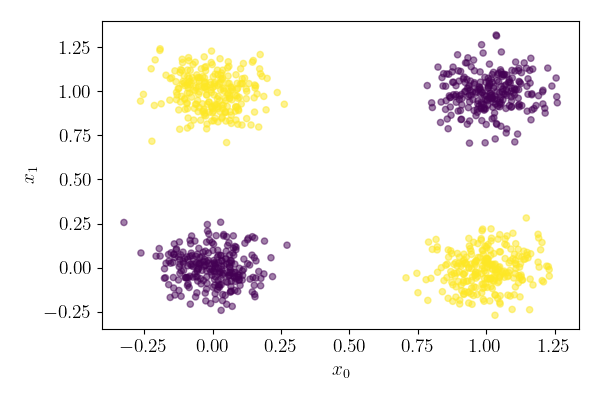

In [5]:
x_xor_features_tensor, y_xor_labels_tensor, _ = generate_xor_dataset_torch(
    n_samples_per_class=500, sigma=0.1
)
_ = scatter_plot_dataset_torch(x_xor_features_tensor, y_xor_labels_tensor)

### Training the Model

Here we train a simple network to fit the function.

In [6]:
xor_model = SimpleNet().to(device)

train_model(
    xor_model,
    x_xor_features_tensor,
    y_xor_labels_tensor,
    learning_rate=0.05,
    number_of_epochs=50,
)

Epoch [10/50], Loss: 0.2500
Epoch [20/50], Loss: 0.2135
Epoch [30/50], Loss: 0.0025
Epoch [40/50], Loss: 0.0000
Epoch [50/50], Loss: 0.0000


### Visualize the Results

We can visualize the decision surface learned.

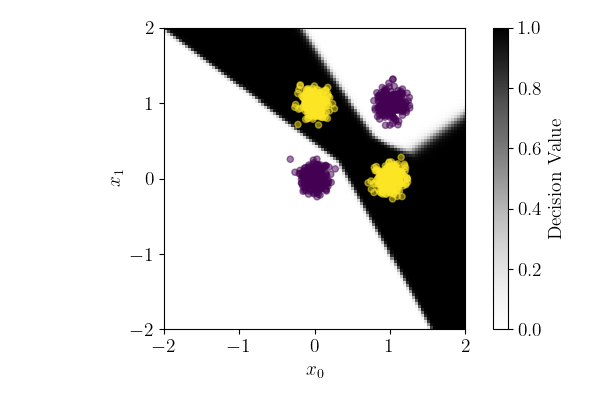

In [7]:
_ = plot_2d_decision_surface_and_features_torch(
    x_xor_features_tensor,
    y_xor_labels_tensor,
    plot_function=xor_model.forward,
    x_range=(-2, 2),
    y_range=(-2, 2),
)

## Half-moon Example

Here we generate a half-moon dataset, train a network on it, and visualize the result.

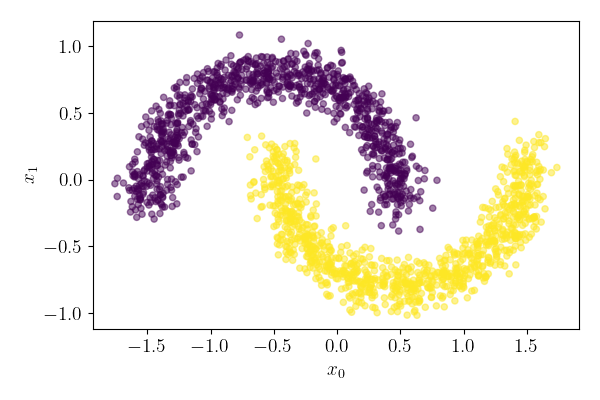

Epoch [10/100], Loss: 0.1057
Epoch [20/100], Loss: 0.0785
Epoch [30/100], Loss: 0.0727
Epoch [40/100], Loss: 0.0685
Epoch [50/100], Loss: 0.0627
Epoch [60/100], Loss: 0.0454
Epoch [70/100], Loss: 0.0223
Epoch [80/100], Loss: 0.0010
Epoch [90/100], Loss: 0.0009
Epoch [100/100], Loss: 0.0001


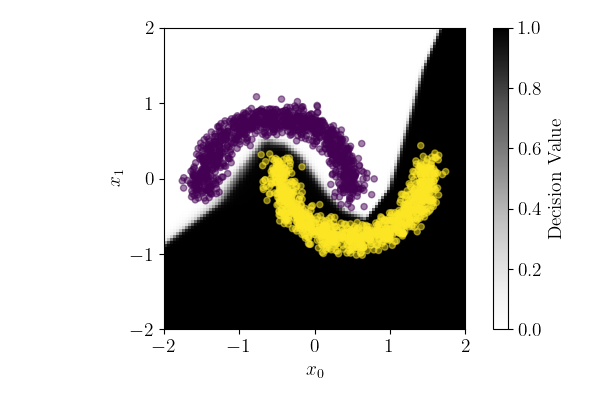

In [8]:
from pydatapull.basicml import generate_half_moon_dataset_torch

# Generate data
x_half_moon_features_tensor, y_half_moon_labels_tensor, _ = (
    generate_half_moon_dataset_torch(
        n_samples_per_class=1000,
        n_clusters_per_class=100,
        radius_r=1,
        separation_offset_d=-0.2,
        sigma=0.1,
    )
)
_ = scatter_plot_dataset_torch(
    x_half_moon_features_tensor, y_half_moon_labels_tensor
)

# Train network
half_moon_model = SimpleNet().to(device)
train_model(
    half_moon_model,
    x_half_moon_features_tensor,
    y_half_moon_labels_tensor,
    learning_rate=0.1,
    number_of_epochs=100,
)

# Visualize Result
_ = plot_2d_decision_surface_and_features_torch(
    x_half_moon_features_tensor,
    y_half_moon_labels_tensor,
    plot_function=half_moon_model.forward,
    x_range=(-2, 2),
    y_range=(-2, 2),
)

## Generic Multi-Distribution Dataset

Here we generate a generic dataset with mixed distributions, train a network on it, and visualize the result.

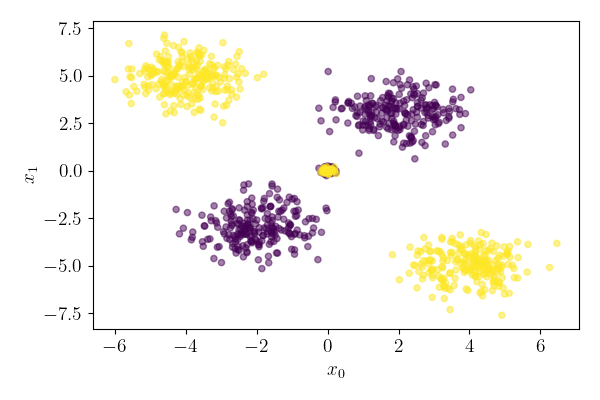

Epoch [10/300], Loss: 0.0894
Epoch [20/300], Loss: 0.0505
Epoch [30/300], Loss: 0.0452
Epoch [40/300], Loss: 0.0446
Epoch [50/300], Loss: 0.0446
Epoch [60/300], Loss: 0.0447
Epoch [70/300], Loss: 0.0447
Epoch [80/300], Loss: 0.0446
Epoch [90/300], Loss: 0.0446
Epoch [100/300], Loss: 0.0446
Epoch [110/300], Loss: 0.0446
Epoch [120/300], Loss: 0.0446
Epoch [130/300], Loss: 0.0446
Epoch [140/300], Loss: 0.0446
Epoch [150/300], Loss: 0.0446
Epoch [160/300], Loss: 0.0446
Epoch [170/300], Loss: 0.0446
Epoch [180/300], Loss: 0.0446
Epoch [190/300], Loss: 0.0446
Epoch [200/300], Loss: 0.0446
Epoch [210/300], Loss: 0.0446
Epoch [220/300], Loss: 0.0446
Epoch [230/300], Loss: 0.0446
Epoch [240/300], Loss: 0.0446
Epoch [250/300], Loss: 0.0446
Epoch [260/300], Loss: 0.0446
Epoch [270/300], Loss: 0.0446
Epoch [280/300], Loss: 0.0446
Epoch [290/300], Loss: 0.0446
Epoch [300/300], Loss: 0.0446


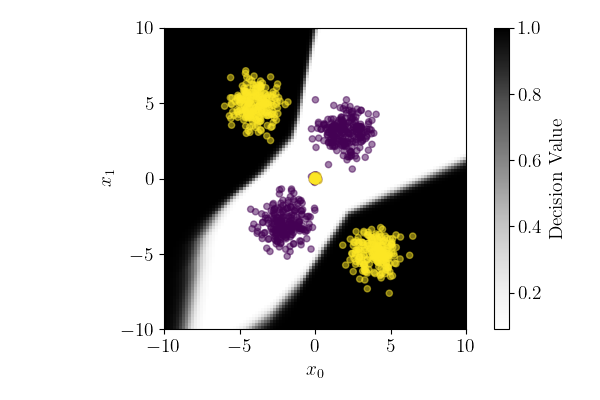

In [9]:
from pydatapull.basicml import (
    generate_multiclass_multidistribution_dataset_torch,
)

# Generate Data
n_samples_per_class = 500
sigma = 0.8

mu_a = np.array([[2, 3], [-2, -3], [0, 0]])
mu_b = np.array([[-4, 5], [4, -5], [0, 0]])
mu_matrix_list = [mu_a, mu_b]
sigma_matrix_list = [
    np.array([[sigma, sigma], [sigma, sigma], [0.1, 0.1]])
] * 2
choice_probabilities_list = [
    np.array([0.45, 0.45, 0.1]),
    np.array([0.45, 0.45, 0.1]),
]
labels = ["X1 = X2", "X1 != X2"]

x_mixed_features_tensor, y_mixed_labels_tensor = (
    generate_multiclass_multidistribution_dataset_torch(
        n_samples_per_class,
        mu_matrix_list,
        sigma_matrix_list,
        choice_probabilities_list,
        labels,
    )
)

_ = scatter_plot_dataset_torch(x_mixed_features_tensor, y_mixed_labels_tensor)

# Train network
mixed_model = SimpleNet().to(device)
train_model(
    mixed_model,
    x_mixed_features_tensor,
    y_mixed_labels_tensor,
    learning_rate=0.1,
    number_of_epochs=300,
)

# Visualize Result
_ = plot_2d_decision_surface_and_features_torch(
    x_mixed_features_tensor,
    y_mixed_labels_tensor,
    plot_function=mixed_model.forward,
    x_range=(-10, 10),
    y_range=(-10, 10),
)